Homework 1: On REST APIs and Data Manipulation

JOEL SONNINO - 799961



In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

def save_stock_data(symbol):
    url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?serietype=line&apikey=b65490dcab9b07a0033f39d80409e568"
    response = requests.get(url)
    data = response.json()
    
    with open(f'{symbol}_data.json', 'w') as f:
        json.dump(data, f)

    print(f"File {symbol}_data.json saved successfully!")

symbols = ['AAPL', 'GE', 'GM']
for symbol in symbols:
    save_stock_data(symbol)

def load_stock_data(symbol): # Load data for each stock
    with open(f'{symbol}_data.json', 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data['historical'])

    df['symbol'] = symbol
    
    return df

df_aapl = load_stock_data('AAPL')
df_ge = load_stock_data('GE')
df_gm = load_stock_data('GM')

df_all = pd.concat([df_aapl, df_ge, df_gm], ignore_index=True) # Combine the data for all the stocks into one DataFrame

df_all.to_csv('stocks_data.csv', index=False)

print("CSV file created successfully!")


File AAPL_data.json saved successfully!
File GE_data.json saved successfully!
File GM_data.json saved successfully!
CSV file created successfully!


Exploring the data frames one by one

In [2]:
# Explore df_aapl
print("AAPL Data - First 5 rows:")
print(df_aapl.head())
print("\nAAPL DataFrame Info:")
print(df_aapl.info())
print("\nAAPL Summary Statistics:")
print(df_aapl.describe())

# Explore df_ge
print("\nGE Data - First 5 rows:")
print(df_ge.head())
print("\nGE DataFrame Info:")
print(df_ge.info())
print("\nGE Summary Statistics:")
print(df_ge.describe())

# Explore df_gm
print("\nGM Data - First 5 rows:")
print(df_gm.head())
print("\nGM DataFrame Info:")
print(df_gm.info())
print("\nGM Summary Statistics:")
print(df_gm.describe())

# Explore the combined df_all
print("\nCombined Data - First 5 rows:")
print(df_all.head())
print("\nCombined DataFrame Info:")
print(df_all.info())
print("\nCombined Summary Statistics:")
print(df_all.describe())

# Group by 'symbol' and get the number of rows for each ticker
print("\nNumber of rows for each ticker:")
print(df_all.groupby('symbol').size())

# Get the unique symbols in the combined DataFrame
print("\nUnique stock symbols in the combined DataFrame:")
print(df_all['symbol'].unique())

# Print the shape of the combined DataFrame
print("\nShape of the combined DataFrame (rows, columns):")
print(df_all.shape)


AAPL Data - First 5 rows:
         date   close symbol
0  2025-01-03  243.36   AAPL
1  2025-01-02  243.85   AAPL
2  2024-12-31  250.42   AAPL
3  2024-12-30  252.20   AAPL
4  2024-12-27  255.59   AAPL

AAPL DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11108 entries, 0 to 11107
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    11108 non-null  object 
 1   close   11108 non-null  float64
 2   symbol  11108 non-null  object 
dtypes: float64(1), object(2)
memory usage: 260.5+ KB
None

AAPL Summary Statistics:
              close
count  11108.000000
mean      24.355515
std       50.215622
min        0.049107
25%        0.300220
50%        0.542410
75%       21.392500
max      259.020000

GE Data - First 5 rows:
         date   close symbol
0  2025-01-03  171.96     GE
1  2025-01-02  168.59     GE
2  2024-12-31  166.79     GE
3  2024-12-30  168.10     GE
4  2024-12-27  170.08     GE

GE DataFrame Info:
<

#Visualize the stock price evolution of the three companies

Index(['date', 'close', 'symbol'], dtype='object')


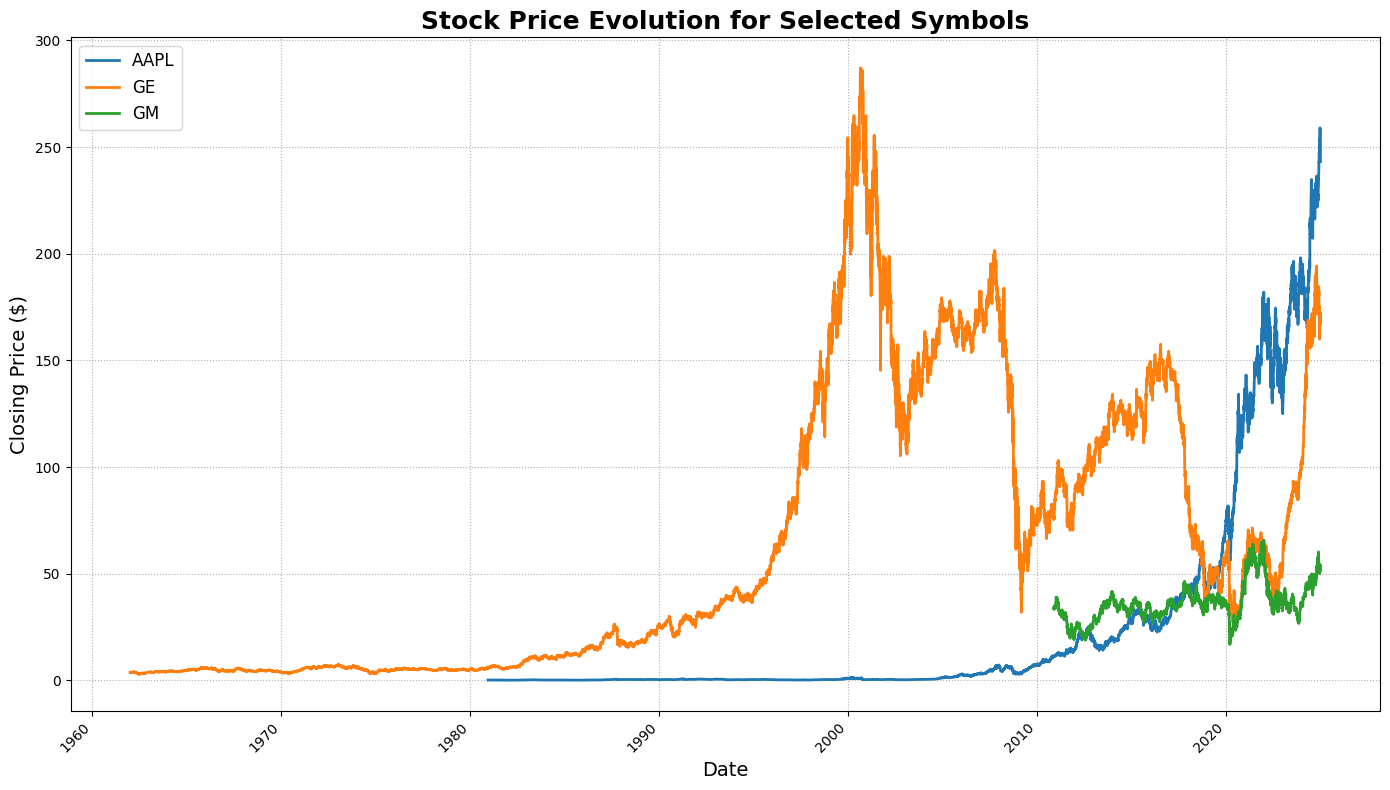

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('stocks_data.csv')
print(df.columns)

df['date'] = pd.to_datetime(df['date']) # Convert the 'date' column to datetime format

df_sorted = df.sort_values('date', ascending=False) # Sort the data by date, with the most recent dates first

symbols = df['symbol'].unique()

plt.figure(figsize=(14, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for i, symbol in enumerate(symbols):
    symbol_data = df_sorted[df_sorted['symbol'] == symbol]
    
    plt.plot(symbol_data['date'], symbol_data['close'], label=symbol, 
             color=colors[i % len(colors)], linewidth=2)

plt.title('Stock Price Evolution for Selected Symbols', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price ($)', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, which='both', linestyle=':', linewidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

#Note: Some parts of this code were developed with the assistance of ChatGPT for improved visualization and presentation of the data.



Moving Averages

1. Calculate the 5-day and 10-day moving averages of a stock’s closing price.

2. Plot the results.

Focus on the year 2024 and to analyze the three companies one by one

/var/folders/6x/myb0fh1j1lg84mlmt40b9t440000gn/T/ipykernel_47114/2874734883.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['5_day_ma'] = df_2024['close'].rolling(window=5).mean()
/var/folders/6x/myb0fh1j1lg84mlmt40b9t440000gn/T/ipykernel_47114/2874734883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['10_day_ma'] = df_2024['close'].rolling(window=10).mean()


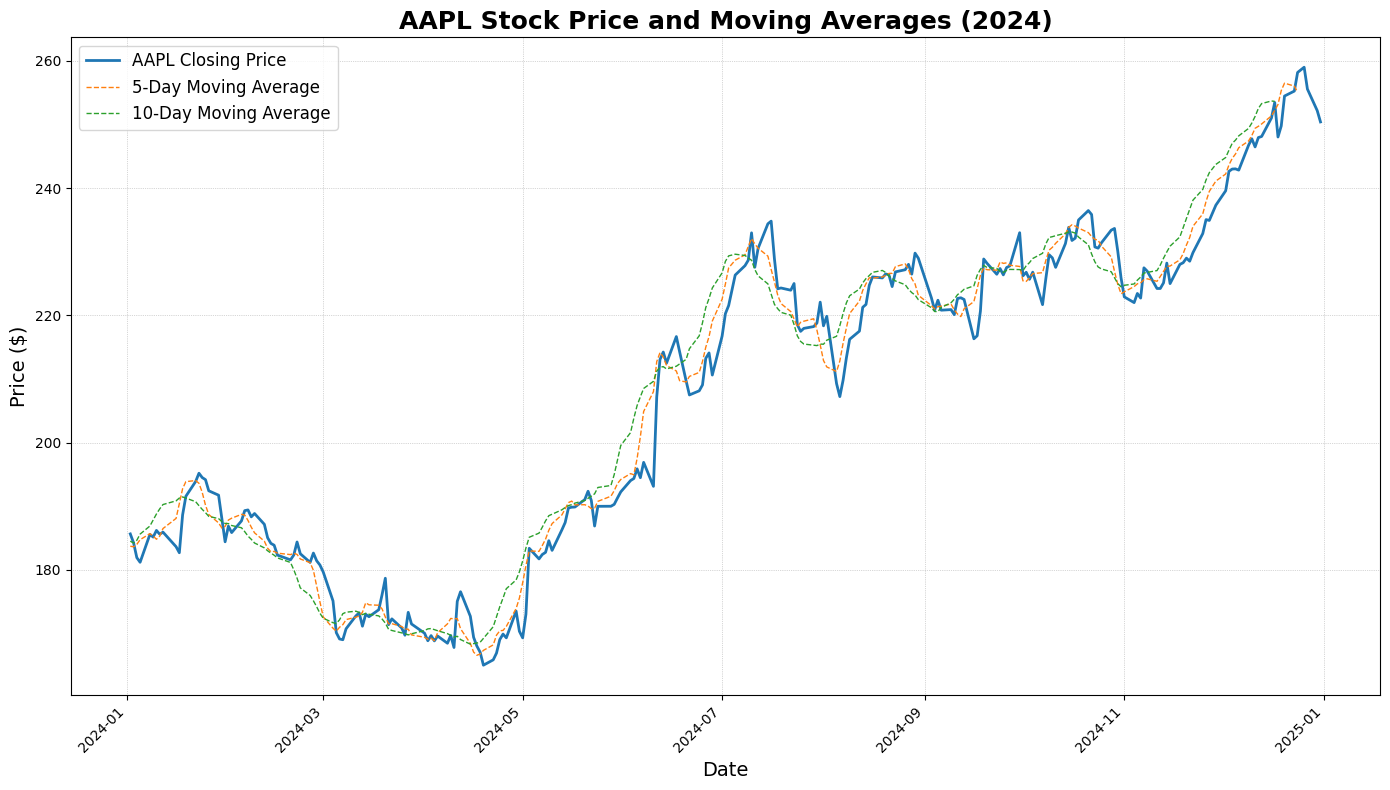

/var/folders/6x/myb0fh1j1lg84mlmt40b9t440000gn/T/ipykernel_47114/2874734883.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['5_day_ma'] = df_2024['close'].rolling(window=5).mean()
/var/folders/6x/myb0fh1j1lg84mlmt40b9t440000gn/T/ipykernel_47114/2874734883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['10_day_ma'] = df_2024['close'].rolling(window=10).mean()


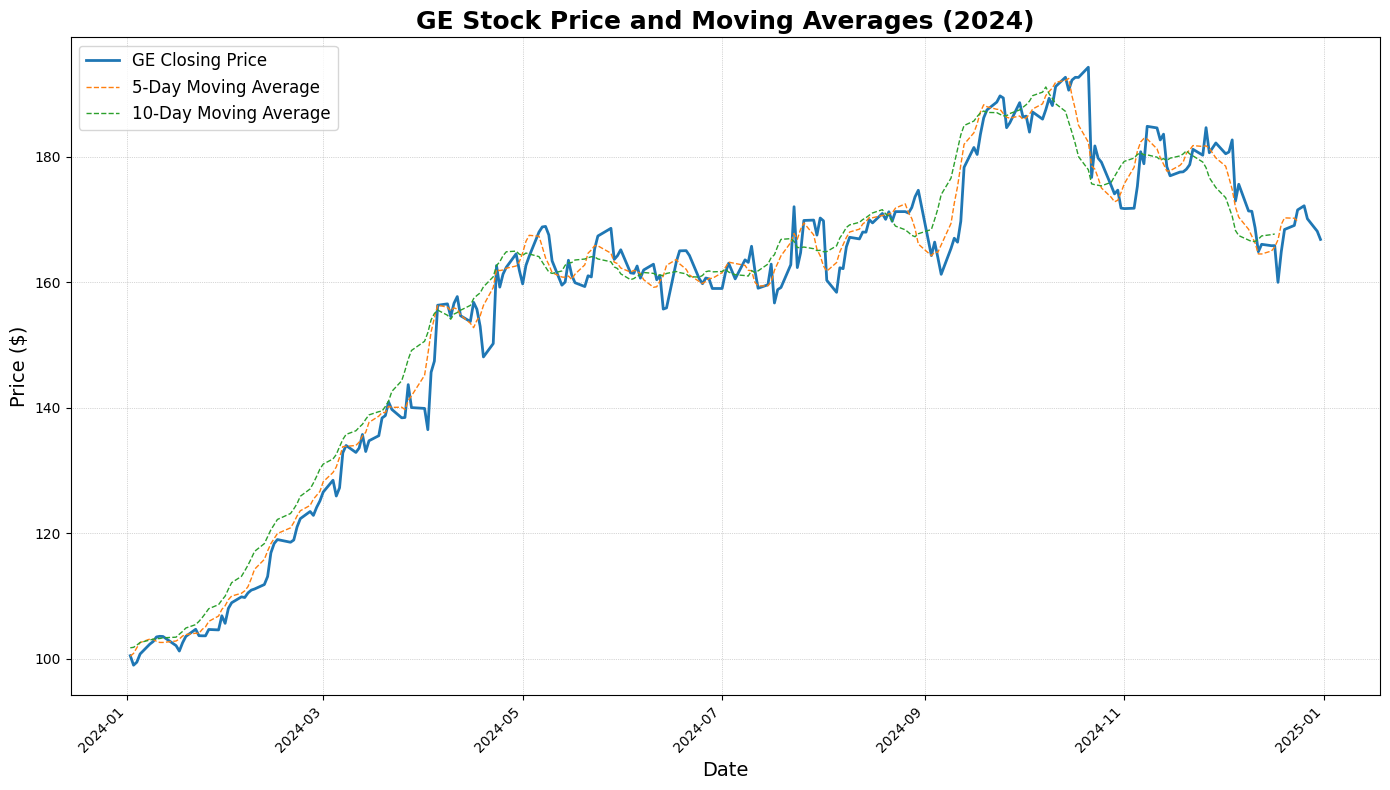

/var/folders/6x/myb0fh1j1lg84mlmt40b9t440000gn/T/ipykernel_47114/2874734883.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['5_day_ma'] = df_2024['close'].rolling(window=5).mean()
/var/folders/6x/myb0fh1j1lg84mlmt40b9t440000gn/T/ipykernel_47114/2874734883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['10_day_ma'] = df_2024['close'].rolling(window=10).mean()


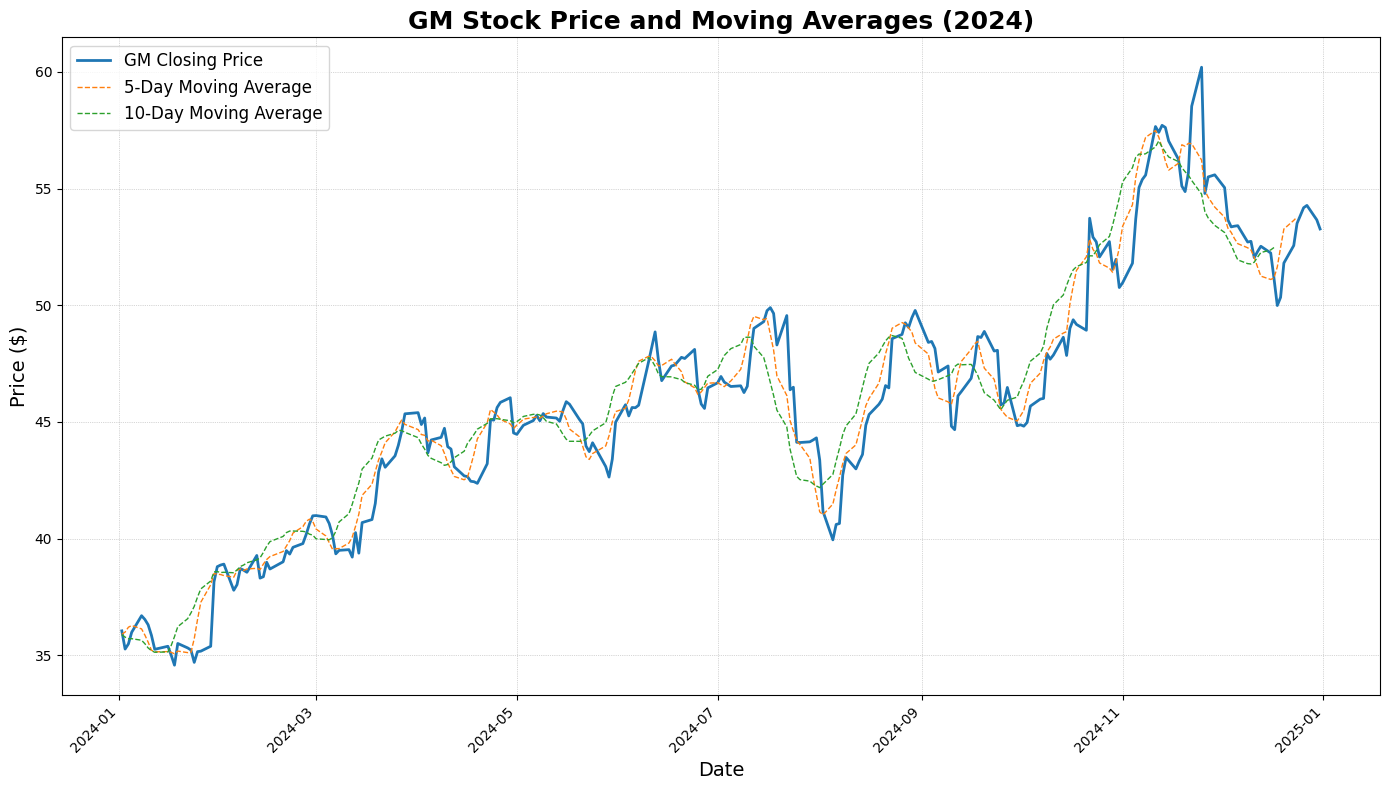

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_plot(symbol):
    df = load_stock_data(symbol)
    df['date'] = pd.to_datetime(df['date'])

    df_2024 = df[df['date'].dt.year == 2024]  # Filter data for the year 2024

    #5-day and 10-day moving averages
    df_2024['5_day_ma'] = df_2024['close'].rolling(window=5).mean()
    df_2024['10_day_ma'] = df_2024['close'].rolling(window=10).mean()

    # Sort the data by date
    df_2024 = df_2024.sort_values('date', ascending=True)

    # Create the plot
    plt.figure(figsize=(14, 8))

    # Plot the closing price data
    plt.plot(df_2024['date'], df_2024['close'], label=f'{symbol} Closing Price', color='#1f77b4', linewidth=2)
    
    # Plot the moving averages
    plt.plot(df_2024['date'], df_2024['5_day_ma'], label='5-Day Moving Average', color='#ff7f0e', linestyle='--', linewidth=1)
    plt.plot(df_2024['date'], df_2024['10_day_ma'], label='10-Day Moving Average', color='#2ca02c', linestyle='--', linewidth=1)

    plt.title(f'{symbol} Stock Price and Moving Averages (2024)', fontsize=18, fontweight='bold')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price ($)', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, which='both', linestyle=':', linewidth=0.5)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

# Load and plot for all three companies
for symbol in ['AAPL', 'GE', 'GM']:
    load_and_plot(symbol)


Now we analyze the correlation between the stocks (2024)

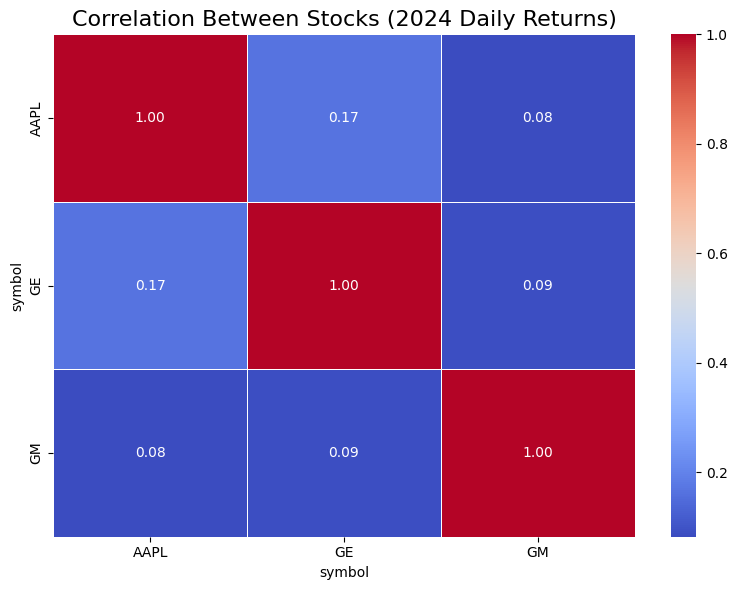

In [5]:
import seaborn as sns  
import matplotlib.pyplot as plt 

def load_and_calculate_returns(symbol):
    df = load_stock_data(symbol)
    df['date'] = pd.to_datetime(df['date'])
    df = df[df['date'].dt.year == 2024]

    df['daily_return'] = df['close'].pct_change()  # Calculate the daily returns

    return df[['date', 'symbol', 'daily_return']]

df_aapl_returns = load_and_calculate_returns('AAPL')
df_ge_returns = load_and_calculate_returns('GE')
df_gm_returns = load_and_calculate_returns('GM')

# Combine the data for all stocks into one DataFrame
df_returns = pd.concat([df_aapl_returns, df_ge_returns, df_gm_returns], ignore_index=True)

# Pivot the DataFrame to have one column per stock symbol
df_returns_pivot = df_returns.pivot(index='date', columns='symbol', values='daily_return')

correlation_matrix = df_returns_pivot.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Stocks (2024 Daily Returns)', fontsize=16)
plt.tight_layout()
plt.show()


Identifying Trends

1. Use a threshold to classify days as bullish (positive daily return abovea certain percentage) or bearish (negative daily return below a certain percentage).

2. Count the number of bullish and bearish days.

3. Highlight bullish and bearish trends on the stock’s closing price chart.

AAPL Trend Counts:
trend
Neutral    197
Bullish     41
Bearish     14
Name: count, dtype: int64

GE Trend Counts:
trend
Neutral    172
Bullish     53
Bearish     27
Name: count, dtype: int64

GM Trend Counts:
trend
Neutral    174
Bullish     53
Bearish     25
Name: count, dtype: int64


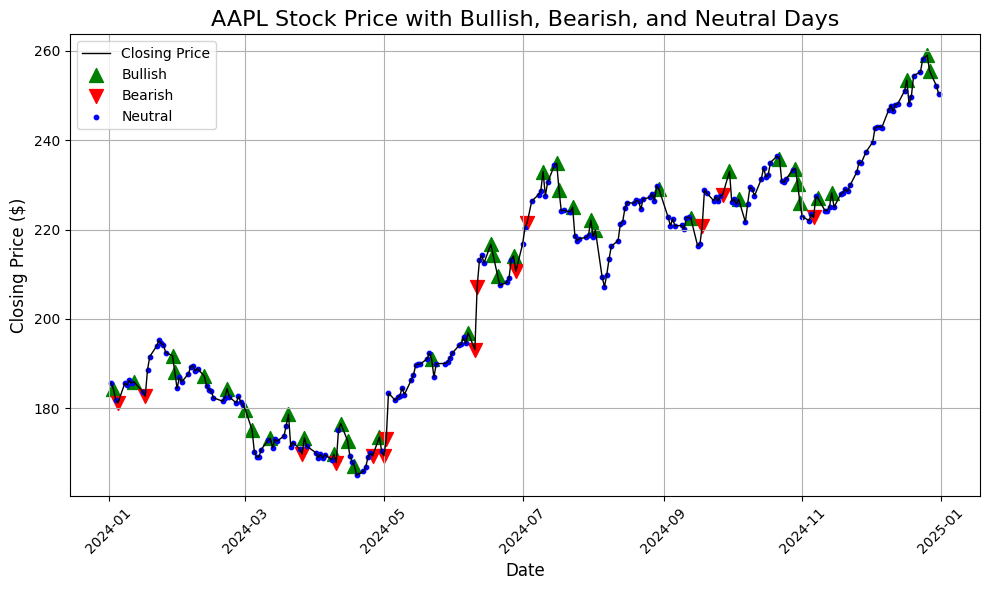

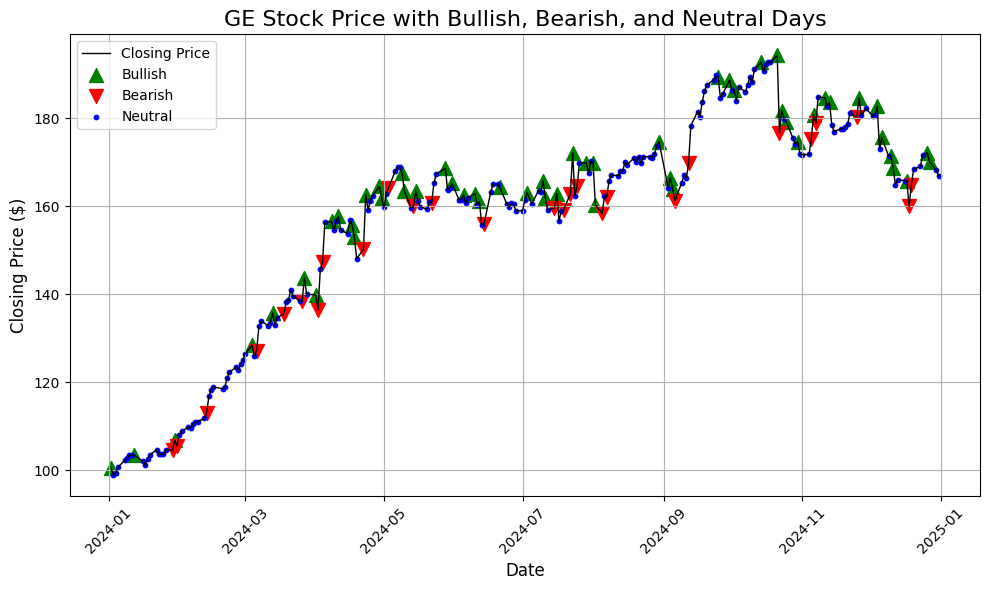

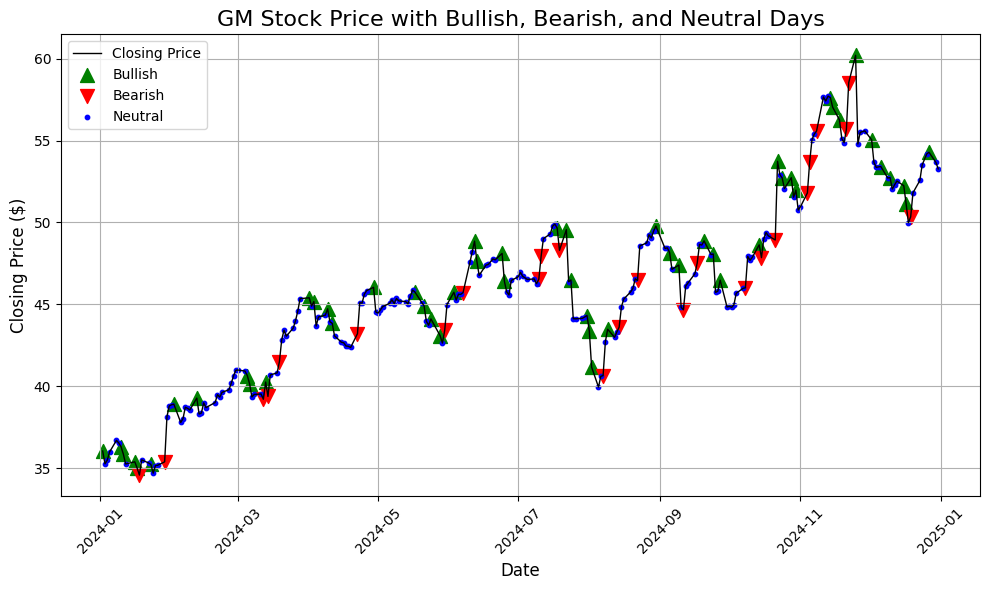

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load and preprocess data for trend analysis
def load_and_preprocess_for_trends(symbol, year=2024, bullish_threshold=0.01, bearish_threshold=-0.02):
    df = load_stock_data(symbol)
    
    # Convert the 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Filter the data for the specific year
    df = df[df['date'].dt.year == year]

    # Calculate the daily returns
    df['daily_return'] = df['close'].pct_change()

    # Classify the days as bullish, bearish, or neutral based on the thresholds
    df['trend'] = df['daily_return'].apply(lambda x: 'Bullish' if x > bullish_threshold else ('Bearish' if x < bearish_threshold else 'Neutral'))
    
    # Count bullish, bearish, and neutral days
    trend_counts = df['trend'].value_counts()

    return df, trend_counts

# Load and preprocess data for the 3 companies for the year 2024
df_aapl_trends, aapl_trend_counts = load_and_preprocess_for_trends('AAPL')
df_ge_trends, ge_trend_counts = load_and_preprocess_for_trends('GE')
df_gm_trends, gm_trend_counts = load_and_preprocess_for_trends('GM')

# Print the counts of Bullish, Bearish, and Neutral days for each company
print("AAPL Trend Counts:")
print(aapl_trend_counts)
print("\nGE Trend Counts:")
print(ge_trend_counts)
print("\nGM Trend Counts:")
print(gm_trend_counts)

# Plot the closing price with highlighted Bullish, Bearish, and Neutral days for each company
def plot_trends(df, symbol):
    # Separate the bullish, bearish, and neutral days
    bullish_days = df[df['trend'] == 'Bullish']
    bearish_days = df[df['trend'] == 'Bearish']
    neutral_days = df[df['trend'] == 'Neutral']
    
    # Plot the closing prices
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['close'], label='Closing Price', color='black', linewidth=1)
    
    # Highlight Bullish, Bearish, and Neutral days
    plt.scatter(bullish_days['date'], bullish_days['close'], color='green', label='Bullish', marker='^', s=100)
    plt.scatter(bearish_days['date'], bearish_days['close'], color='red', label='Bearish', marker='v', s=100)
    plt.scatter(neutral_days['date'], neutral_days['close'], color='blue', label='Neutral', marker='o', s=10)  # Neutral days marked with a circle
    
    plt.title(f'{symbol} Stock Price with Bullish, Bearish, and Neutral Days', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Closing Price ($)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot trends for each company
plot_trends(df_aapl_trends, 'AAPL')
plot_trends(df_ge_trends, 'GE')
plot_trends(df_gm_trends, 'GM')


Extra: Analysis on variation of the prices of the stocks after the victory of Trump on 5th Nov 2024

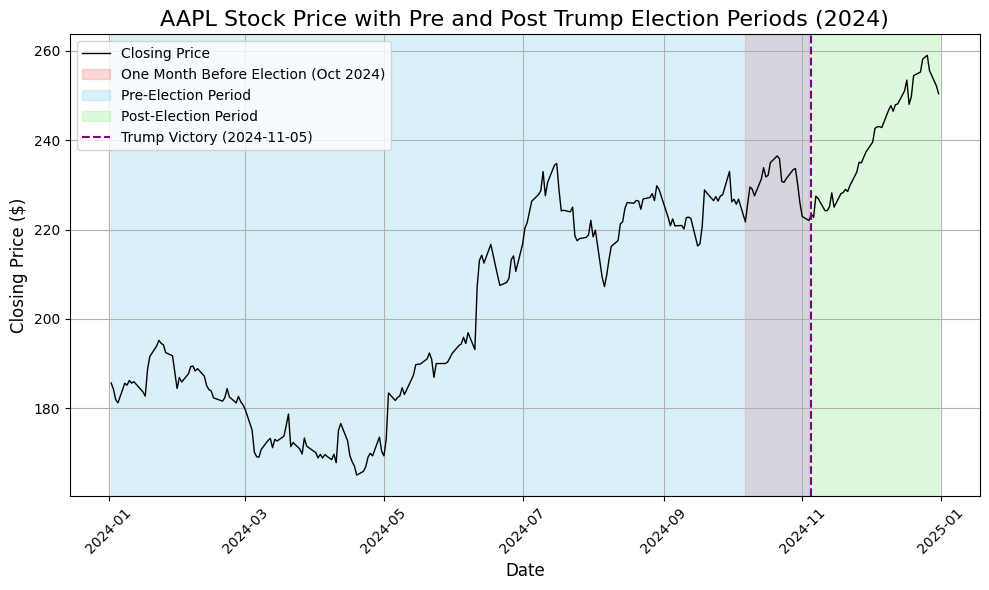

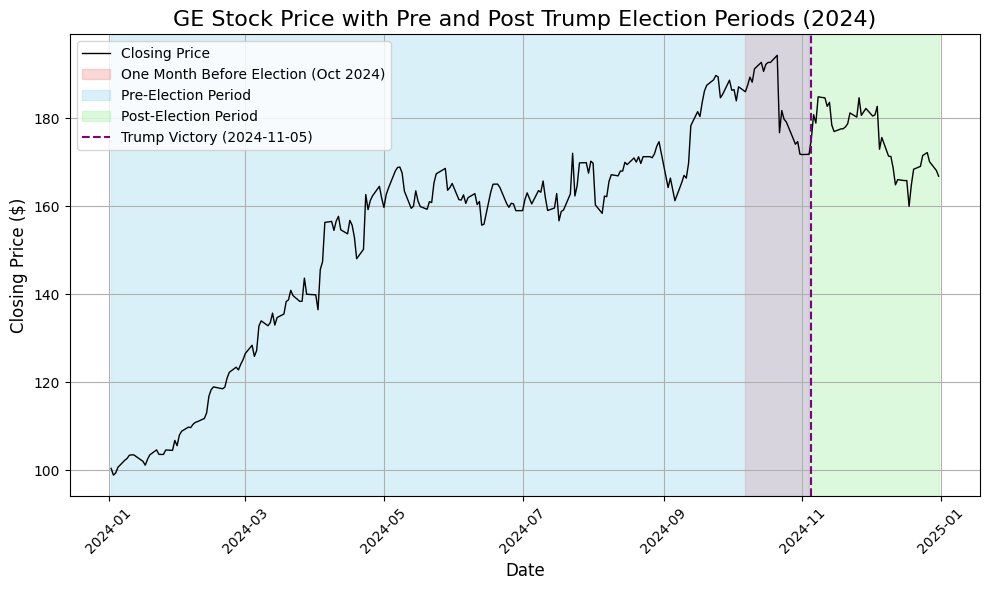

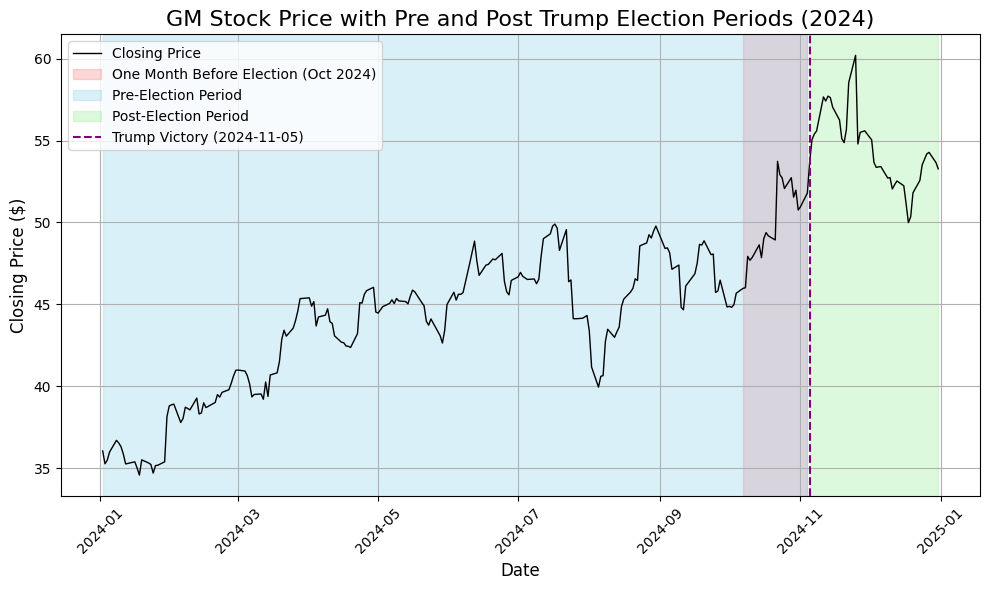

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot data with different color regions before and after the election
def plot_price_with_regions(df, symbol, start_date='2024-11-05'):
    # Create a mask to split the data into pre-election and post-election periods
    pre_election = df[df['date'] < start_date]
    post_election = df[df['date'] >= start_date]
    
    # Add an additional region for the month before the election (October 2024)
    one_month_before = df[df['date'] >= '2024-10-05']
    one_month_before = one_month_before[one_month_before['date'] < start_date]

    # Plot the closing prices
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['close'], label='Closing Price', color='black', linewidth=1)

    # Highlight the regions with different colors
    plt.axvspan(one_month_before['date'].iloc[0], one_month_before['date'].iloc[-1], color='lightcoral', alpha=0.3, label='One Month Before Election (Oct 2024)')
    plt.axvspan(pre_election['date'].iloc[0], pre_election['date'].iloc[-1], color='skyblue', alpha=0.3, label='Pre-Election Period')
    plt.axvspan(post_election['date'].iloc[0], post_election['date'].iloc[-1], color='lightgreen', alpha=0.3, label='Post-Election Period')
    
    # Add a vertical line at the election date
    plt.axvline(pd.to_datetime(start_date), color='purple', linestyle='--', label=f'Trump Victory ({start_date})')

    plt.title(f'{symbol} Stock Price with Pre and Post Trump Election Periods (2024)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Closing Price ($)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot price with pre and post-election periods for each company
plot_price_with_regions(df_aapl_trends, 'AAPL')
plot_price_with_regions(df_ge_trends, 'GE')
plot_price_with_regions(df_gm_trends, 'GM')


The graphs above show the price movements of AAPL, GE, and GM before and after the U.S. election on November 5, 2024.
As seen from the chart, **Apple (AAPL)**, being a technology company, benefited the most post-election,
we observe a significant uptick in stock price after the election, showcasing how it benefited from the market's positive sentiment towards tech stocks.


Now we calculate the volatility of the three stocks:

Function to plot volatility for each company

In [8]:
import pandas as pd

# Function to load stock data and calculate volatility (30-day rolling standard deviation)
def load_and_preprocess_for_volatility(symbol, year=2024, window=30):
    # Load the stock data for the given symbol
    df = load_stock_data(symbol)
    
    # Convert the 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Filter the data for the specific year
    df = df[df['date'].dt.year == year]

    # Calculate the daily returns
    df['daily_return'] = df['close'].pct_change()

    # Calculate the rolling standard deviation (volatility)
    df['rolling_volatility'] = df['daily_return'].rolling(window=window).std()

    return df

# Load and preprocess data for the 3 companies for the year 2024
df_aapl_volatility = load_and_preprocess_for_volatility('AAPL')
df_ge_volatility = load_and_preprocess_for_volatility('GE')
df_gm_volatility = load_and_preprocess_for_volatility('GM')

# Function to calculate the average volatility
def calculate_average_volatility(df):
    return df['rolling_volatility'].mean()

# Calculate the average volatility for each company
aapl_avg_volatility = calculate_average_volatility(df_aapl_volatility)
ge_avg_volatility = calculate_average_volatility(df_ge_volatility)
gm_avg_volatility = calculate_average_volatility(df_gm_volatility)

# Create a DataFrame to display the results
volatility_df = pd.DataFrame({
    'Company': ['AAPL', 'GE', 'GM'],
    'Average Volatility (2024)': [aapl_avg_volatility, ge_avg_volatility, gm_avg_volatility]
})

# Display the table
print(volatility_df)


  Company  Average Volatility (2024)
0    AAPL                   0.014009
1      GE                   0.019290
2      GM                   0.019557


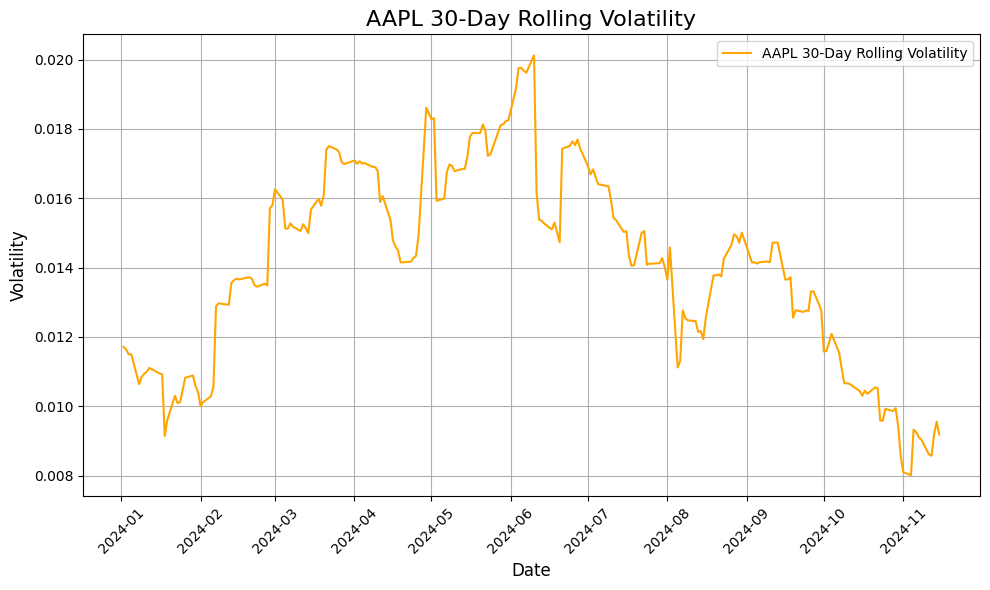

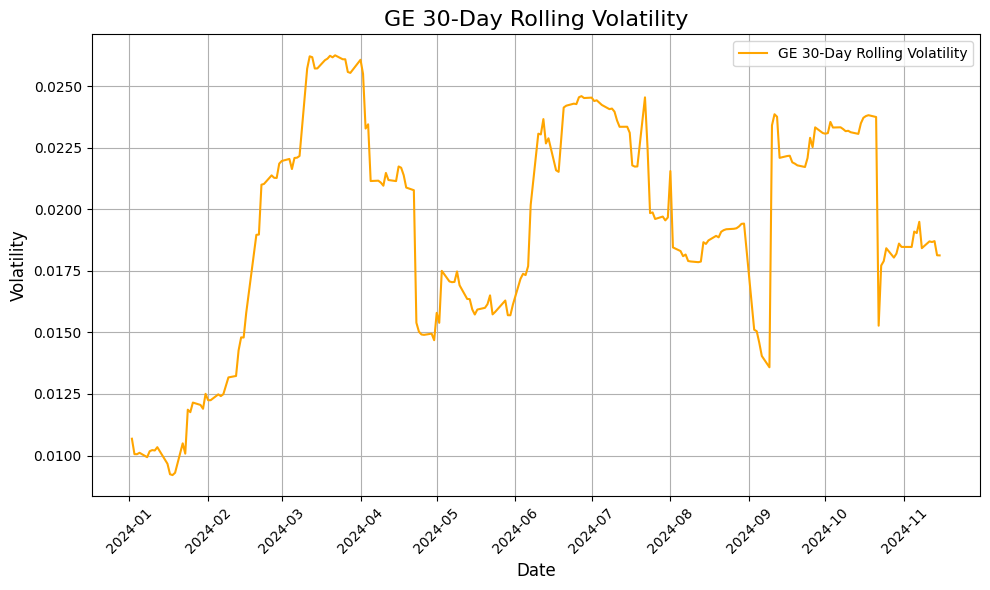

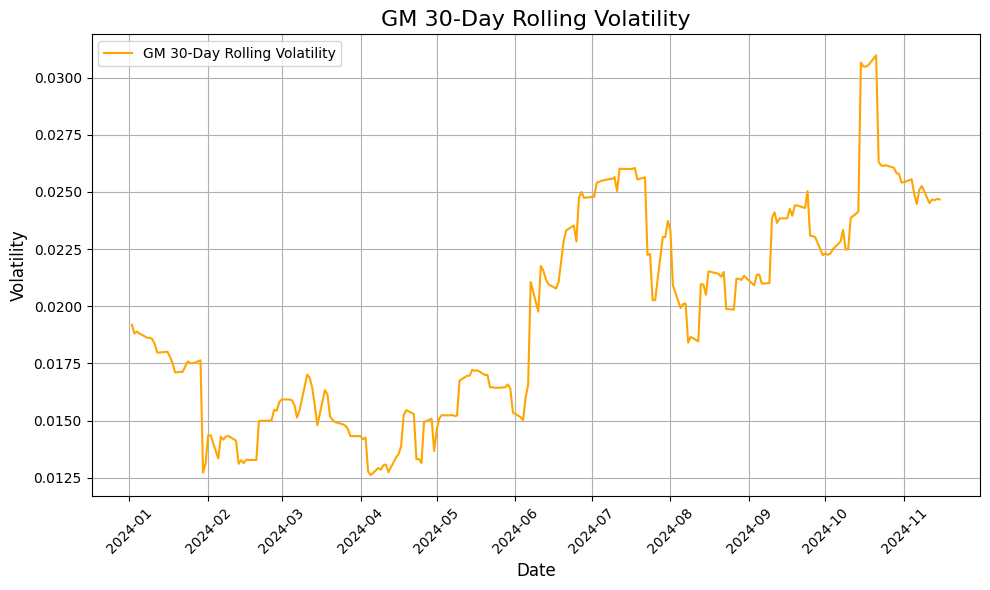

In [9]:
def plot_volatility(df, symbol):
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['rolling_volatility'], label=f'{symbol} 30-Day Rolling Volatility', color='orange')
    plt.title(f'{symbol} 30-Day Rolling Volatility', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Volatility', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot volatility for AAPL, GE, GM
plot_volatility(df_aapl_volatility, 'AAPL')
plot_volatility(df_ge_volatility, 'GE')
plot_volatility(df_gm_volatility, 'GM')
